In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2034443971030656145
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11320098816
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6096675233208517917
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
 xla_global_id: 416903419]

In [ ]:
'''
Densenet :
    - DenseNet architecture is based on couple of residual blocks which are connected to each other with shotcut connection.
    - Each architecture(DenseNet) consists of four DenseBlocks with varying number of layers.
      For example, 
        - DenseNet-121 has [6,12,24,16] layers in the four dense blocks
        - DenseNet-169 has [6, 12, 32, 32] layers
    - Layers between the dense blocks as transition layers which do the convolution and pooling 

### DenseNet
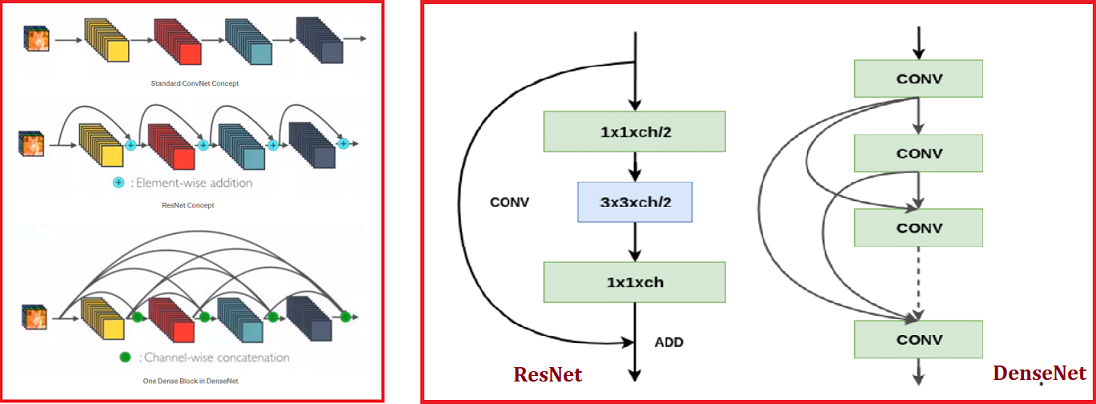

### DenseNet-121 Architecture

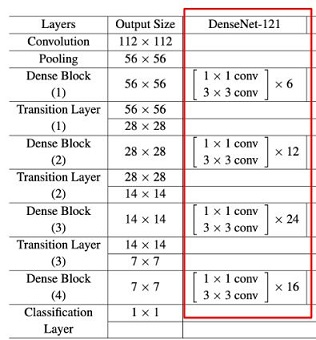

In [4]:
from tensorflow.keras.layers import  Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization,ReLU,Conv2D,MaxPool2D,Concatenate,AvgPool2D,GlobalAvgPool2D,Dense
from tensorflow.keras import backend as K

In [5]:
def bn_rl_conv(x, f, k=1, s=1, p='same'):
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(f, k, strides=s, padding=p)(x)
    return x


'''
- take as inputs:
  - a tensor (tensor)
  - the filters of the conv operations (k)
  - how many times the conv operations will be applied (reps)
- run reps times:
  - apply the 1×1 conv operation with $4\cdot k$ filters ([v])
  - apply the 3×3 conv operation with $k$ filters ([iii])
  - Concatenate this tensor with the input tensor
- return as output the final tensor

'''
def dense_block(tensor, r,f=32):
    # r = how many times the conv operations will be applied
    # Residual Block Included here
    
    for _ in range(r):
        x = bn_rl_conv(tensor, 4*f)
        x = bn_rl_conv(x, f, 3)
        tensor = Concatenate()([tensor, x])
    return tensor

'''
- take as input:
  - a tensor (x)
  - the compression factor (theta)
- run:
  - apply the 1×1 conv operation with theta times the existing number of filters ([vi])
  - apply Average Pool layer with pool size 2 and stride 2 ([vii])
- return as output the final tensor

'''
def transition_block(x):
    f = K.int_shape(x)[-1] // 2
    x = bn_rl_conv(x, f)
    x = AvgPool2D(2, strides=2, padding='same')(x)
    return x

In [6]:
def DenseNet(input_shape, n_classes):
    repetitions = 6, 12, 24, 16
    
    input = Input(input_shape)
    
    x = Conv2D(64, 7, strides=2, padding='same')(input)
    x = MaxPool2D(3, strides=2, padding='same')(x)
    
    for r in repetitions:
        d = dense_block(x, r)
        x = transition_block(d)
        
    x = GlobalAvgPool2D()(d)
    
    output = Dense(n_classes, activation='softmax')(x)
    
    model = Model(input, output)
    
    return model

In [8]:
model =  DenseNet((224,224,3),3)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_121 (Conv2D)            (None, 112, 112, 64  9472        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 56, 56, 64)  0           ['conv2d_121[0][0]']             
                                                                                            

In [9]:
% cd /content/drive/MyDrive/ComputerVision/dataset/ImgClassification

/content/drive/MyDrive/ComputerVision/dataset/ImgClassification


In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('/content/drive/MyDrive/ComputerVision/dataset/ImgClassification/rooms_dataset')

room_types = os.listdir('/content/drive/MyDrive/ComputerVision/dataset/ImgClassification/rooms_dataset')
print (room_types)  #what kinds of rooms are in this dataset

print("Types of rooms found: ", len(dataset_path))

['bed_room', 'dining_room', 'living_room']
Types of rooms found:  3


In [11]:
rooms = []

for item in room_types:
 # Get all the file names
 all_rooms = os.listdir('rooms_dataset' + '/' +item)
 #print(all_shoes)

 # Add them to the list
 for room in all_rooms:
    rooms.append((item, str('rooms_dataset' + '/' +item) + '/' + room))
    print(rooms)

[('bed_room', 'rooms_dataset/bed_room/architecture-modern-house-beautiful-interiors-260nw-278631791.jpg')]
[('bed_room', 'rooms_dataset/bed_room/architecture-modern-house-beautiful-interiors-260nw-278631791.jpg'), ('bed_room', 'rooms_dataset/bed_room/bed-1048194__340.jpg')]
[('bed_room', 'rooms_dataset/bed_room/architecture-modern-house-beautiful-interiors-260nw-278631791.jpg'), ('bed_room', 'rooms_dataset/bed_room/bed-1048194__340.jpg'), ('bed_room', 'rooms_dataset/bed_room/bed-1846251__340.jpg')]
[('bed_room', 'rooms_dataset/bed_room/architecture-modern-house-beautiful-interiors-260nw-278631791.jpg'), ('bed_room', 'rooms_dataset/bed_room/bed-1048194__340.jpg'), ('bed_room', 'rooms_dataset/bed_room/bed-1846251__340.jpg'), ('bed_room', 'rooms_dataset/bed_room/bed-1303451__340.jpg')]
[('bed_room', 'rooms_dataset/bed_room/architecture-modern-house-beautiful-interiors-260nw-278631791.jpg'), ('bed_room', 'rooms_dataset/bed_room/bed-1048194__340.jpg'), ('bed_room', 'rooms_dataset/bed_room/b

In [12]:
# Build a dataframe        
rooms_df = pd.DataFrame(data=rooms, columns=['room type', 'image'])
print(rooms_df.head())

  room type                                              image
0  bed_room  rooms_dataset/bed_room/architecture-modern-hou...
1  bed_room        rooms_dataset/bed_room/bed-1048194__340.jpg
2  bed_room        rooms_dataset/bed_room/bed-1846251__340.jpg
3  bed_room        rooms_dataset/bed_room/bed-1303451__340.jpg
4  bed_room    rooms_dataset/bed_room/bed-4540208__340 (1).jpg


In [13]:
# Let's check how many samples for each category are present
print("Total number of rooms in the dataset: ", len(rooms_df))

room_count = rooms_df['room type'].value_counts()

print("rooms in each category: ")
print(room_count)

Total number of rooms in the dataset:  37
rooms in each category: 
living_room    14
bed_room       12
dining_room    11
Name: room type, dtype: int64


In [14]:
import cv2
path = '/content/drive/MyDrive/ComputerVision/dataset/ImgClassification/rooms_dataset/'

im_size = 224

images = []
labels = []

for i in room_types:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [15]:
images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(37, 224, 224, 3)

In [16]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
y=rooms_df['room type'].values
#print(y[:5])

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [17]:
y=y.reshape(-1,1)

from sklearn.preprocessing import OneHotEncoder

# binary encode
onehot_encoder = OneHotEncoder(categories='auto',sparse=False)
Y = onehot_encoder.fit_transform(y)

In [18]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

images, Y = shuffle(images, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(35, 224, 224, 3)
(35, 3)
(2, 224, 224, 3)
(2, 3)


In [19]:
model.fit(train_x, train_y, epochs = 3, batch_size = 32)

Epoch 1/3
2/2 [==============================] - 52s 3s/step - loss: 2.3858 - accuracy: 0.3714
Epoch 2/3
2/2 [==============================] - 1s 153ms/step - loss: 5.2267 - accuracy: 0.4286
Epoch 3/3
2/2 [==============================] - 1s 156ms/step - loss: 5.0705 - accuracy: 0.3429


Input image shape: (1, 224, 224, 3)


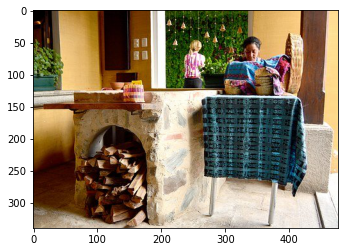

In [21]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = '/content/drive/MyDrive/ComputerVision/dataset/ImgClassification/rooms_dataset/dining_room/dining-room-1420457__340.jpg'

img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [22]:
print(model.predict(x))

[[0. 1. 0.]]
